# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Read in Data

First I imported the nescessary packages and read in the Kings County housing data. 

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
% matplotlib inline
plt.style.use('seaborn')

In [2]:
train_Housing_df = pd.read_csv('kc_house_data_train.csv')
test_Housing_df = pd.read_csv('kc_house_data_test_features.csv')

# Exploratory Data Analysis 
    
### Next, I familiarized myself with the data.  
* checked column names 
* checked the shape of the dataframe 
* checked the types of each column  

In [3]:
train_Housing_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
train_Housing_df.shape

(17290, 22)

In [5]:
train_Housing_df.info

<bound method DataFrame.info of        Unnamed: 0          id             date      price  bedrooms  \
0               0  2591820310  20141006T000000   365000.0         4   
1               1  7974200820  20140821T000000   865000.0         5   
2               2  7701450110  20140815T000000  1038000.0         4   
3               3  9522300010  20150331T000000  1490000.0         3   
4               4  9510861140  20140714T000000   711000.0         3   
...           ...         ...              ...        ...       ...   
17285       17285   627300195  20150303T000000   750000.0         5   
17286       17286  8819900270  20140520T000000   440000.0         2   
17287       17287  3816300095  20140514T000000   310000.0         3   
17288       17288   122069107  20141204T000000   427500.0         3   
17289       17289  6703100135  20150116T000000   348000.0         3   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  ...  grade  \
0           2.25         2070      8893 

In [6]:
train_Housing_df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Clean up the data 
* I checked for null values
* deleted Unnamed: 0 column because it was empty

In [7]:
train_Housing_df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
del train_Housing_df['Unnamed: 0']

### Check the predictors
In this step I wanted to look at the predictor variables in the data set.  I created the dataframe housing_pred which contained only the predictors.  I also checked the number of unique values for columns I assumed where catagorical. 

In [9]:
housing_pred = train_Housing_df.iloc[:,4:]
housing_pred.head()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [10]:
train_Housing_df[['bedrooms','bathrooms','floors','waterfront','view','condition','grade']].nunique()

bedrooms      13
bathrooms     30
floors         6
waterfront     2
view           5
condition      5
grade         12
dtype: int64

### Check for Multicollinearity
Using the housing_pred datarame I created a scatterplot matrix to check if there was correlation between the predictor variables.  The matrix shows several possible correlated variables, particularly with sqft_living.  The matrix also shows many cases of catagoracal variables.

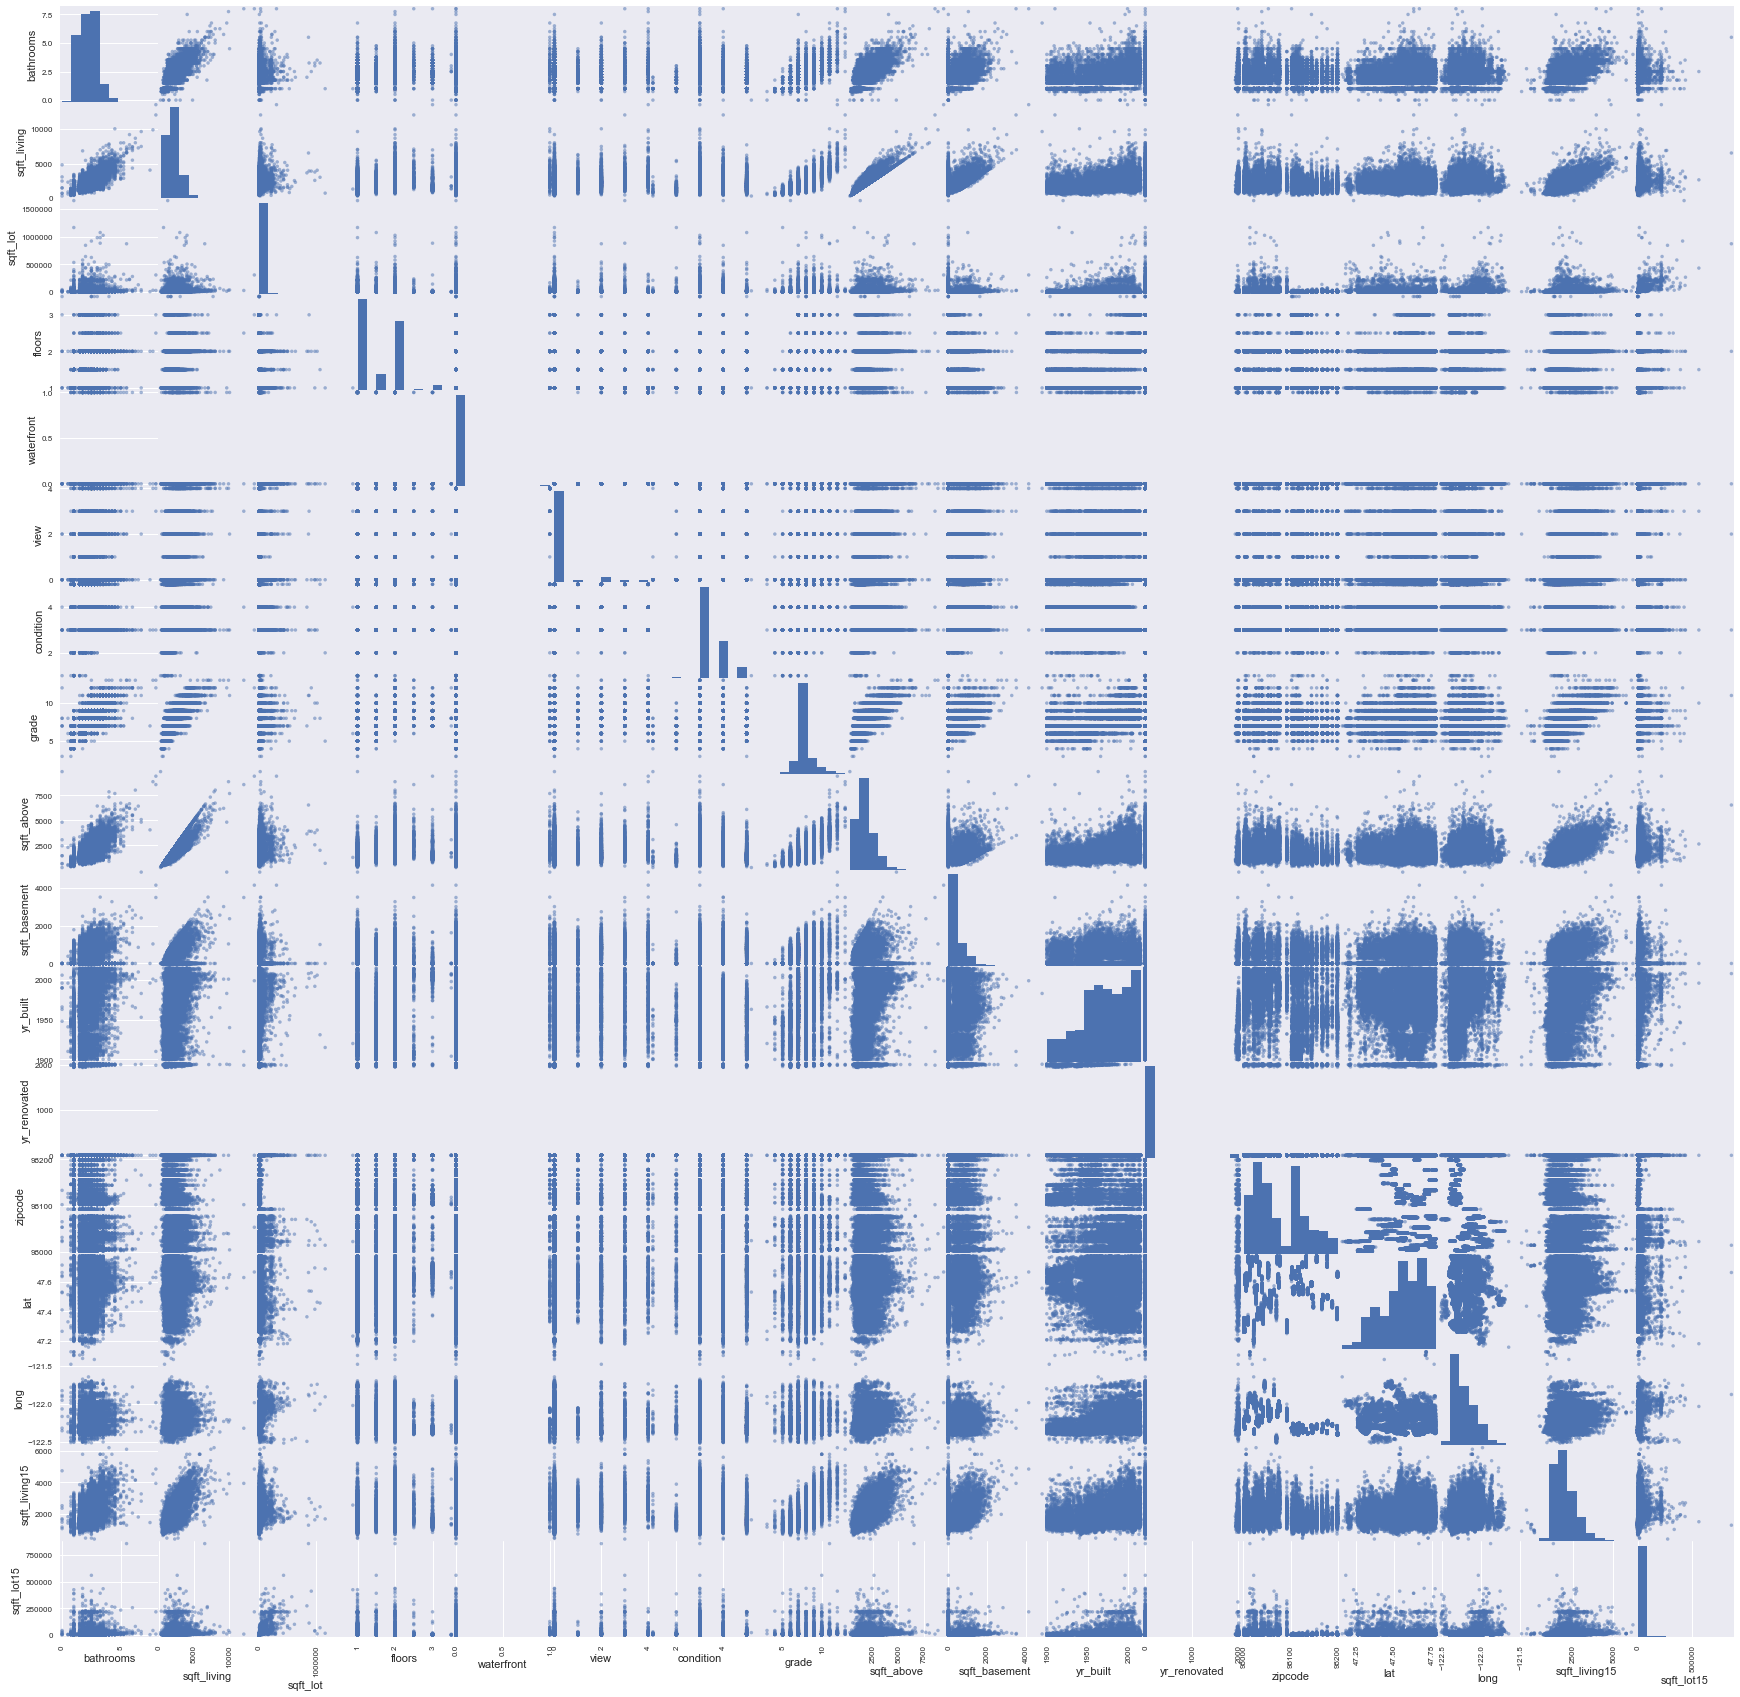

In [11]:
pd.plotting.scatter_matrix(housing_pred, figsize = [30,30]);
plt.show()

I created a histagram of the predictors to get a better look at the distributions of data.  I noticed several anomolies in predictors I thought where continuous like sqft_basement and the sqft_lot variables.  This is likely due to a large number of houses not having a basement or a yard.  

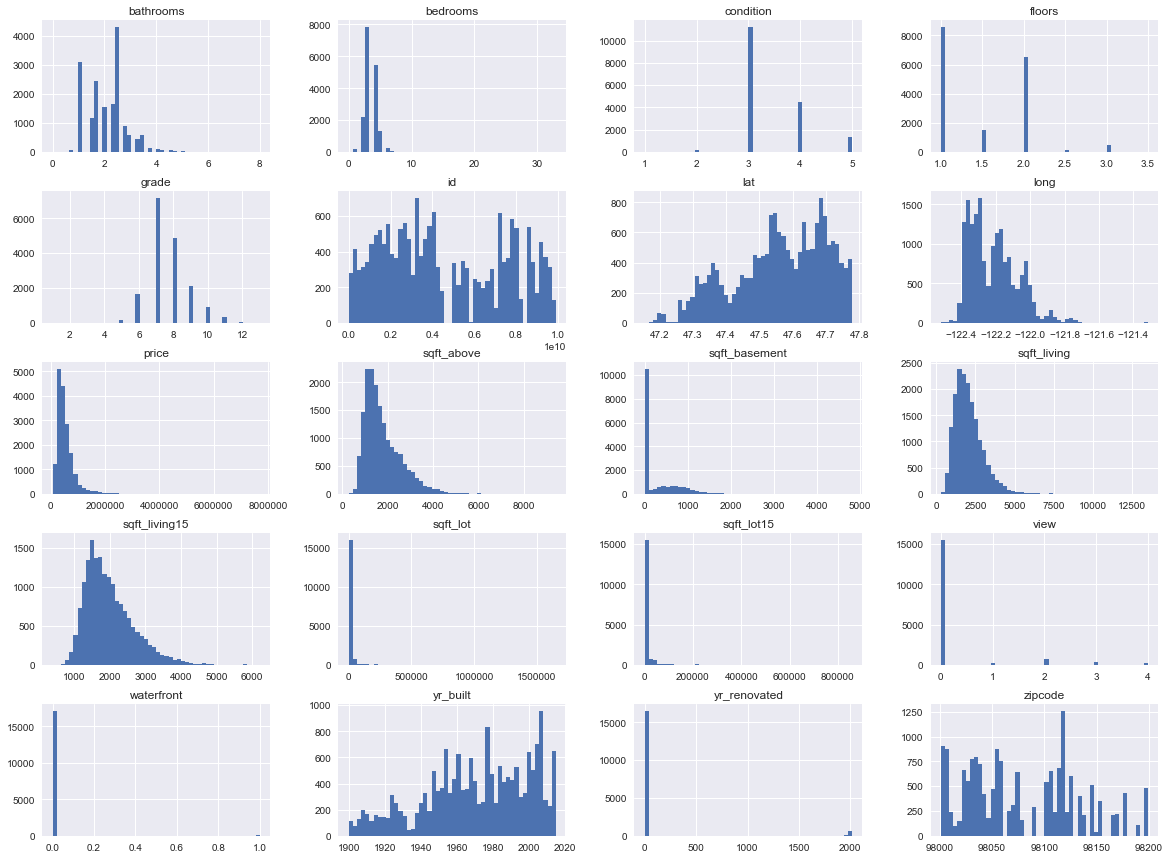

In [12]:
train_Housing_df.hist(bins=50, figsize=(20,15))
plt.show()

I wanted to take a closer look at the catagorical data as related to price to observe outliers.  While there are a few noticible outliers, I decided to leave them in because they might not be outliers in the larger holdout set of data.  I did notice an interesting positive correlation between price and despite the variable being catagorical.  I also observed a large gap of data in the yr_renovated variable.  This is most likely due to the houses with no renovation having a value of zero being compared to renovated houses which start in the 1970s.

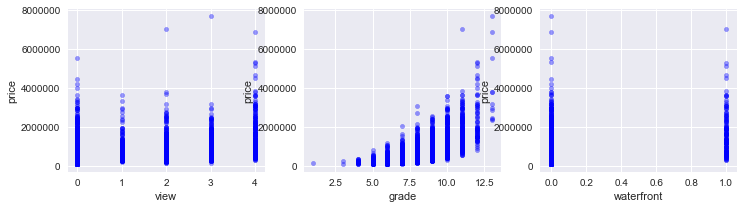

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for xcol, ax in zip(['view','grade','waterfront'], axes):
    train_Housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

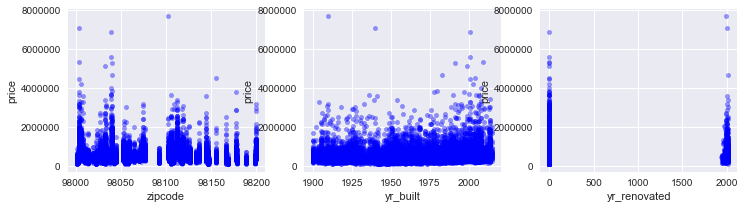

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for xcol, ax in zip(['zipcode','yr_built','yr_renovated'], axes):
    train_Housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### 

In [15]:
#Anova of all predictor variables
formula = 'price ~  C(view) + C(grade) + C(floors) +C(waterfront)+ C(bedrooms) + C(bathrooms) + C(condition) + yr_built + yr_renovated + zipcode + sqft_living + sqft_lot + sqft_basement + sqft_living15 + sqft_lot15'
lm = ols(formula, train_Housing_df).fit()
table = sm.stats.anova_lm(lm, type=2)
print(table)

                    df        sum_sq       mean_sq            F         PR(>F)
C(view)            4.0  4.064221e+14  1.016055e+14  2447.164793   0.000000e+00
C(grade)          11.0  9.880174e+14  8.981976e+13  2163.305150   0.000000e+00
C(floors)          5.0  2.354042e+13  4.708084e+12   113.394010  2.537497e-118
C(waterfront)      1.0  2.390029e+13  2.390029e+13   575.637540  3.754476e-125
C(bedrooms)       12.0  2.838154e+13  2.365128e+12    56.964013  8.881062e-136
C(bathrooms)      29.0  6.697985e+13  2.309650e+12    55.627828  3.274149e-307
C(condition)       4.0  2.282399e+13  5.705998e+12   137.428725  8.399454e-116
yr_built           1.0  6.911258e+13  6.911258e+13  1664.573590   0.000000e+00
yr_renovated       1.0  1.157272e+12  1.157272e+12    27.872838   1.311287e-07
zipcode            1.0  7.855159e+11  7.855159e+11    18.919117   1.371633e-05
sqft_living        1.0  5.275892e+13  5.275892e+13  1270.696384  1.397936e-268
sqft_lot           1.0  2.252828e+12  2.252828e+12  

### t-tests for some catagorical predictors ##

In [16]:
high_grade_df = train_Housing_df[train_Housing_df.grade >= 6]
low_grade_df = train_Housing_df[train_Housing_df.grade <= 5]
high_grade_df.shape , low_grade_df.shape

((17073, 21), (217, 21))

In [17]:
ttest_ind(high_grade_df.price, low_grade_df.price)

Ttest_indResult(statistic=12.019204622472271, pvalue=3.81838048026549e-33)

In [18]:
yes_waterfront_df = train_Housing_df[train_Housing_df.waterfront == 1]
no_waterfront_df = train_Housing_df[train_Housing_df.waterfront == 0]
yes_waterfront_df.shape , no_waterfront_df.shape

((138, 21), (17152, 21))

In [19]:
high_view_df = train_Housing_df[train_Housing_df.view >= 3]
low_view_df = train_Housing_df[train_Housing_df.view <= 2]
high_view_df.shape , low_view_df.shape

((680, 21), (16610, 21))

In [20]:
ttest_ind(high_view_df.price, low_view_df.price)

Ttest_indResult(statistic=47.664984739824035, pvalue=0.0)

### check for coliniarity ###

In [21]:
housing_pred.corr()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125
grade,0.664191,0.762929,0.110320,0.458984,0.092234,0.249554,-0.142066,1.000000,0.758247,0.165003,0.448003,0.007988,-0.184946,0.116196,0.198369,0.715745,0.116062
sqft_above,0.686853,0.876696,0.180755,0.528509,0.077162,0.164747,-0.157466,0.758247,1.000000,-0.051199,0.424328,0.020413,-0.259745,0.001374,0.338192,0.731077,0.193874
sqft_basement,0.282700,0.435529,0.008065,-0.247481,0.083433,0.279939,0.166923,0.165003,-0.051199,1.000000,-0.130948,0.068611,0.079368,0.106727,-0.146112,0.199521,0.010007


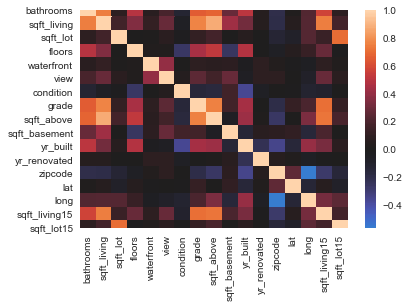

In [22]:
sns.heatmap(housing_pred.corr(), center=0);

In [23]:
df=housing_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [24]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(sqft_living, grade)",0.762929
"(sqft_above, grade)",0.758247
"(bathrooms, sqft_living)",0.755270
"(sqft_living15, sqft_living)",0.755066


### dropped paired variables ###

In [25]:
pair_drop_train = train_Housing_df.drop(['grade','sqft_above','bathrooms','sqft_living15','id'], axis=1,)
pair_drop_train.head(1)

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,20141006T000000,365000.0,4,2070,8893,2.0,0,0,4,0,1986,0,98058,47.4388,-122.162,7700


### change date to just month sold ###

In [26]:
pair_drop_train['date'] = pd.to_datetime(pair_drop_train['date'])
pair_drop_train.head(2)

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,2014-10-06,365000.0,4,2070,8893,2.0,0,0,4,0,1986,0,98058,47.4388,-122.162,7700
1,2014-08-21,865000.0,5,2900,6730,1.0,0,0,5,1070,1977,0,98115,47.6784,-122.285,6283


In [27]:
pair_drop_train['date'] = pair_drop_train['date'].dt.month
pair_drop_train.head(2)

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,10,365000.0,4,2070,8893,2.0,0,0,4,0,1986,0,98058,47.4388,-122.162,7700
1,8,865000.0,5,2900,6730,1.0,0,0,5,1070,1977,0,98115,47.6784,-122.285,6283


### create dummy variables for catagorical data ###

In [28]:
month_sold_dummies = pd.get_dummies(pair_drop_train['date'],prefix='month',drop_first=True)
water_dummies = pd.get_dummies(pair_drop_train['waterfront'], prefix='waterfront',drop_first=True)
floors_dummies = pd.get_dummies(pair_drop_train['floors'], prefix='floors',drop_first=True)
view_dummies = pd.get_dummies(pair_drop_train['view'], prefix='view',drop_first=True)
cond_dummies = pd.get_dummies(pair_drop_train['condition'],prefix='cond',drop_first=True)
zip_dummies = pd.get_dummies(pair_drop_train['zipcode'],prefix='zip',drop_first=True)
bed_dummies = pd.get_dummies(pair_drop_train['bedrooms'],prefix='bed',drop_first=True)
yr_built_dummies = pd.get_dummies(pair_drop_train['yr_built'],prefix='yrbuilt',drop_first=True)
yr_renovated_dummies = pd.get_dummies(pair_drop_train['yr_renovated'],prefix='yrren',drop_first=True)
dummie_data = pd.concat([month_sold_dummies, water_dummies,floors_dummies,view_dummies,cond_dummies,zip_dummies,bed_dummies,yr_built_dummies,yr_renovated_dummies],axis=1)
dummie_data.head(1)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,yrren_2006,yrren_2007,yrren_2008,yrren_2009,yrren_2010,yrren_2011,yrren_2012,yrren_2013,yrren_2014,yrren_2015
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
drop_catvar_train = pair_drop_train.drop(['bedrooms','floors',
                                            'waterfront','view','condition','yr_built',
                                            'yr_renovated','zipcode','date'],axis=1)

In [30]:
ols_1 = pd.concat([drop_catvar_train, dummie_data], axis=1)
ols_1.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_1.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_1.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_1.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_1.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_1.head(1)

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,month_2,month_3,month_4,...,yrren_2006,yrren_2007,yrren_2008,yrren_2009,yrren_2010,yrren_2011,yrren_2012,yrren_2013,yrren_2014,yrren_2015
0,365000.0,2070,8893,0,47.4388,-122.162,7700,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
outcome = 'price'
predictors = ols_1.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [32]:
model_1 = ols(formula=formula, data=ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:14   Log-Likelihood:            -2.3218e+05
No. Observations:               17290   AIC:                         4.650e+05
Df Residuals:                   16994   BIC:                         4.673e+05
Df Model:                         295                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -3.8e+07   7.08e+06     -5.371      0.000   -5.19e+07   -2.41e+07
sqft_living     280.7869      2.563    109.535      0.000     275.762     285.812
sqft_lot          0.2559      0.043      5.992      0.000       0.172       0.340
sqft_basement  -107.6281      4.204    -25.599      0.000    -115.869     -99.387
lat            2.886e+05   7.35e+04      3.927      0.000    1.45e+05    4.33e+05
long          -1.971e+05   5.24e+04     -3.761      0.000      -3e+05   -9.44e+04
sqft_lot15       -0.0748      0.069     -1.082      0.279      -0.210       0.061
month_2        -192.7062   7972.005     -0.024      0.981   -1.58e+04    1.54e+04
month_3        2.205e+04   7340.095      3.004      0.003    7662.775    3.64e+04
month_4        3.164e+04   7125.094      4.440      0.000    1.77e+04    4.56e+04
month_5         986.9327   7061.086      0.140      0.889   -1.29e+04    1.48e+04
month_6        1221.1919   7166.616      0.170      0.865   -1.28e+04    1.53e+04
month_7       -8392.2343   7162.184     -1.172      0.241   -2.24e+04    5646.389
month_8       -2506.3267   7305.254     -0.343      0.732   -1.68e+04    1.18e+04
month_9       -1.537e+04   7443.314     -2.065      0.039      -3e+04    -783.215
month_10      -5560.5967   7356.802     -0.756      0.450      -2e+04    8859.497
month_11      -1.133e+04   7710.117     -1.469      0.142   -2.64e+04    3785.110
month_12      -9286.4929   7696.449     -1.207      0.228   -2.44e+04    5799.344
waterfront_1    5.84e+05   1.82e+04     32.011      0.000    5.48e+05     6.2e+05
floors_1_5    -4.626e+04   5474.634     -8.449      0.000    -5.7e+04   -3.55e+04
floors_2      -6.178e+04   4598.423    -13.434      0.000   -7.08e+04   -5.28e+04
floors_2_5     4.446e+04   1.52e+04      2.928      0.003    1.47e+04    7.42e+04
floors_3      -9.934e+04   9872.862    -10.062      0.000   -1.19e+05      -8e+04
floors_3_5     3416.2464   6.41e+04      0.053      0.958   -1.22e+05    1.29e+05
view_1         8.649e+04   1.06e+04      8.151      0.000    6.57e+04    1.07e+05
view_2         8.947e+04   6391.630     13.998      0.000    7.69e+04    1.02e+05
view_3         1.744e+05   8794.198     19.831      0.000    1.57e+05    1.92e+05
view_4         3.693e+05   1.32e+04     28.023      0.000    3.43e+05    3.95e+05
cond_2         1.052e+05   3.71e+04      2.839      0.005    3.26e+04    1.78e+05
cond_3         1.029e+05   3.44e+04      2.993      0.003    3.55e+04     1.7e+05
cond_4         1.274e+05   3.44e+04      3.702      0.000    5.99e+04    1.95e+05
cond_5          1.75e+05   3.46e+04      5.058      0.000    1.07e+05    2.43e+05
zip_98002      1.938e+04    1.7e+04      1.142      0.254   -1.39e+04    5.26e+04
zip_98003     -3472.9235   1.51e+04     -0.231      0.818    -3.3e+04     2.6e+04
zip_98004      7.704e+05   2.74e+04     28.097   

In [67]:
y = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train_1 = linreg.predict(x_train)
y_hat_test_1 = linreg.predict(x_test)

train_mse_1 = (mean_squared_error(y_train, y_hat_train))**.5
test_mse_1 = (mean_squared_error(y_test, y_hat_test_1))**.5
print('train_mse_1',train_mse_1)
print('test_mse_1',test_mse_1)

train_mse_1 168260.10927164683
test_mse_1 162454.48492761355


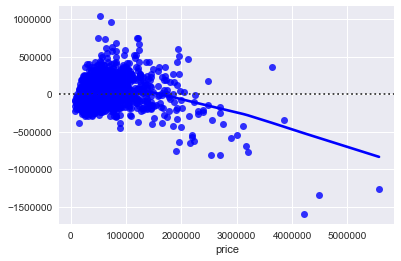

In [68]:
sns.residplot(y_test, y_hat_test_1, lowess=True, color='b')

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [35]:
pair_drop_train['renovated_after_2000'] = np.where(pair_drop_train['yr_renovated']>= 2000, 1,0)
pair_drop_train.renovated_after_2000.value_counts()

0    16922
1      368
Name: renovated_after_2000, dtype: int64

In [36]:
pair_drop_train2 = pair_drop_train.drop(['yr_renovated'],axis=1)


In [37]:
pair_drop_train2.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,renovated_after_2000
0,10,365000.0,4,2070,8893,2.0,0,0,4,0,1986,98058,47.4388,-122.162,7700,0
1,8,865000.0,5,2900,6730,1.0,0,0,5,1070,1977,98115,47.6784,-122.285,6283,0
2,8,1038000.0,4,3770,10893,2.0,0,2,3,0,1997,98006,47.5646,-122.129,9685,0
3,3,1490000.0,3,4560,14608,2.0,0,2,3,0,1990,98034,47.6995,-122.228,14226,0
4,7,711000.0,3,2550,5376,2.0,0,0,3,0,2004,98052,47.6647,-122.083,4050,0


In [38]:
renovated = pair_drop_train2[pair_drop_train.renovated_after_2000 == 1]
not_renovated = pair_drop_train2[pair_drop_train.renovated_after_2000 == 0]
renovated.shape, not_renovated.shape

((368, 16), (16922, 16))

In [39]:
ttest_ind(renovated.price, not_renovated.price)

Ttest_indResult(statistic=14.094132422844451, pvalue=7.311946527267104e-45)

In [40]:
month_sold_dummies = pd.get_dummies(pair_drop_train2['date'],prefix='month',drop_first=True)
water_dummies = pd.get_dummies(pair_drop_train2['waterfront'], prefix='waterfront',drop_first=True)
floors_dummies = pd.get_dummies(pair_drop_train2['floors'], prefix='floors',drop_first=True)
view_dummies = pd.get_dummies(pair_drop_train2['view'], prefix='view',drop_first=True)
cond_dummies = pd.get_dummies(pair_drop_train2['condition'],prefix='cond',drop_first=True)
zip_dummies = pd.get_dummies(pair_drop_train2['zipcode'],prefix='zip',drop_first=True)
bed_dummies = pd.get_dummies(pair_drop_train2['bedrooms'],prefix='bed',drop_first=True)
yr_built_dummies = pd.get_dummies(pair_drop_train2['yr_built'],prefix='yrbuilt',drop_first=True)
renovated_dummies = pd.get_dummies(pair_drop_train2['renovated_after_2000'],prefix='renovated',drop_first=True)

dummie_data = pd.concat([month_sold_dummies, water_dummies,floors_dummies,view_dummies,cond_dummies,zip_dummies,bed_dummies,yr_built_dummies,renovated_dummies],axis=1)
dummie_data.head(1)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,renovated_1
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
drop_catvar_train2 = pair_drop_train2.drop(['bedrooms','floors',
                                            'waterfront','view','condition','yr_built',
                                            'zipcode','date','renovated_after_2000'],axis=1)

In [42]:
ols_2 = pd.concat([drop_catvar_train2, dummie_data], axis=1)
ols_2.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_2.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_2.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_2.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_2.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_2.head(1)

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,month_2,month_3,month_4,...,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,renovated_1
0,365000.0,2070,8893,0,47.4388,-122.162,7700,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
outcome = 'price'
predictors = ols_2.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [44]:
model_2 = ols(formula=formula, data=ols_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     306.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:16   Log-Likelihood:            -2.3228e+05
No. Observations:               17290   AIC:                         4.650e+05
Df Residuals:                   17061   BIC:                         4.668e+05
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.749e+07   7.08e+06     -5.292      0.000   -5.14e+07   -2.36e+07
sqft_living     281.6626      2.565    109.826      0.000     276.636     286.690
sqft_lot          0.2491      0.043      5.820      0.000       0.165       0.333
sqft_basement  -107.5484      4.210    -25.547      0.000    -115.800     -99.297
lat            2.814e+05   7.36e+04      3.823      0.000    1.37e+05    4.26e+05
long          -1.956e+05   5.24e+04     -3.730      0.000   -2.98e+05   -9.28e+04
sqft_lot15       -0.0733      0.069     -1.058      0.290      -0.209       0.062
month_2        -183.4272   7986.354     -0.023      0.982   -1.58e+04    1.55e+04
month_3        2.262e+04   7353.792      3.076      0.002    8203.157     3.7e+04
month_4        3.236e+04   7139.855      4.532      0.000    1.84e+04    4.64e+04
month_5        1439.2843   7075.489      0.203      0.839   -1.24e+04    1.53e+04
month_6        1950.7168   7178.008      0.272      0.786   -1.21e+04     1.6e+04
month_7       -7198.8142   7174.916     -1.003      0.316   -2.13e+04    6864.760
month_8       -2488.4237   7317.266     -0.340      0.734   -1.68e+04    1.19e+04
month_9       -1.411e+04   7456.110     -1.893      0.058   -2.87e+04     502.427
month_10      -5138.1018   7366.224     -0.698      0.485   -1.96e+04    9300.456
month_11      -1.065e+04   7723.500     -1.379      0.168   -2.58e+04    4487.775
month_12      -8943.6288   7709.958     -1.160      0.246   -2.41e+04    6168.682
waterfront_1   5.739e+05   1.81e+04     31.725      0.000    5.38e+05    6.09e+05
floors_1_5    -4.717e+04   5466.458     -8.630      0.000   -5.79e+04   -3.65e+04
floors_2      -6.123e+04   4579.570    -13.371      0.000   -7.02e+04   -5.23e+04
floors_2_5     4.944e+04   1.52e+04      3.258      0.001    1.97e+04    7.92e+04
floors_3      -9.838e+04   9865.876     -9.971      0.000   -1.18e+05    -7.9e+04
floors_3_5     3153.8318   6.44e+04      0.049      0.961   -1.23e+05    1.29e+05
view_1         8.551e+04   1.06e+04      8.059      0.000    6.47e+04    1.06e+05
view_2         8.868e+04   6396.682     13.863      0.000    7.61e+04    1.01e+05
view_3         1.718e+05   8763.825     19.608      0.000    1.55e+05    1.89e+05
view_4         3.729e+05   1.32e+04     28.333      0.000    3.47e+05    3.99e+05
cond_2         1.031e+05   3.72e+04      2.774      0.006    3.03e+04    1.76e+05
cond_3         1.013e+05   3.45e+04      2.937      0.003    3.37e+04    1.69e+05
cond_4         1.257e+05   3.45e+04      3.641      0.000     5.8e+04    1.93e+05
cond_5          1.73e+05   3.47e+04      4.982      0.000    1.05e+05    2.41e+05
zip_98002      2.032e+04    1.7e+04      1.198      0.231   -1.29e+04    5.36e+04
zip_98003     -3355.6801   1.51e+04     -0.223      0.824   -3.29e+04    2.62e+04
zip_98004      7.729e+05   2.75e+04     28.147   

In [69]:
y = ols_2[['price']]
x = ols_2.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test_2 = linreg.predict(x_test)

train_mse_2 = (mean_squared_error(y_train, y_hat_train))**.5
test_mse_2 = (mean_squared_error(y_test, y_hat_test_2))**.5

print('train_mse_1',train_mse_1)
print('test_mse_1',test_mse_1)
print('train_mse_2',train_mse_2)
print('test_mse_2',test_mse_2)

train_mse_1 168260.10927164683
test_mse_1 162454.48492761355
train_mse_2 166456.84077558527
test_mse_2 161975.6608362388


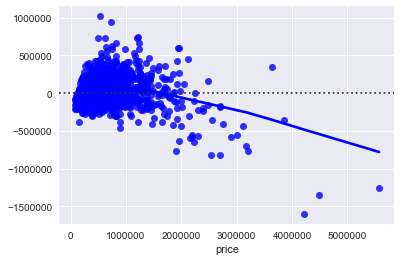

In [70]:
sns.residplot(y_test, y_hat_test_2, lowess=True, color='b')

In [47]:
pair_drop_train.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,renovated_after_2000
0,10,365000.0,4,2070,8893,2.0,0,0,4,0,1986,0,98058,47.4388,-122.162,7700,0
1,8,865000.0,5,2900,6730,1.0,0,0,5,1070,1977,0,98115,47.6784,-122.285,6283,0
2,8,1038000.0,4,3770,10893,2.0,0,2,3,0,1997,0,98006,47.5646,-122.129,9685,0
3,3,1490000.0,3,4560,14608,2.0,0,2,3,0,1990,0,98034,47.6995,-122.228,14226,0
4,7,711000.0,3,2550,5376,2.0,0,0,3,0,2004,0,98052,47.6647,-122.083,4050,0


In [48]:
pair_drop_train2['bedXsqft_lot'] = pair_drop_train2.bedrooms * pair_drop_train.sqft_lot
pair_drop_train2.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,renovated_after_2000,bedXsqft_lot
0,10,365000.0,4,2070,8893,2.0,0,0,4,0,1986,98058,47.4388,-122.162,7700,0,35572
1,8,865000.0,5,2900,6730,1.0,0,0,5,1070,1977,98115,47.6784,-122.285,6283,0,33650
2,8,1038000.0,4,3770,10893,2.0,0,2,3,0,1997,98006,47.5646,-122.129,9685,0,43572
3,3,1490000.0,3,4560,14608,2.0,0,2,3,0,1990,98034,47.6995,-122.228,14226,0,43824
4,7,711000.0,3,2550,5376,2.0,0,0,3,0,2004,98052,47.6647,-122.083,4050,0,16128


In [49]:
pair_drop_train2.bedXsqft_lot.median()

25423.5

In [50]:
large_lot = pair_drop_train2[pair_drop_train2.bedXsqft_lot >=25423.5]
small_lot = pair_drop_train2[pair_drop_train2.bedXsqft_lot <25423.5]
large_lot.shape, small_lot.shape

((8645, 17), (8645, 17))

In [51]:
ttest_ind(large_lot.price, small_lot.price)

Ttest_indResult(statistic=23.916043237704052, pvalue=2.1713223325904497e-124)

In [52]:
drop_catvar_train3 = pair_drop_train2.drop(['bedrooms','floors',
                                            'waterfront','view','condition','yr_built',
                                            'zipcode','date','sqft_lot','renovated_after_2000','sqft_lot15'],axis=1)

drop_catvar_train3.head()

,price,sqft_living,sqft_basement,lat,long,bedXsqft_lot
0,365000.0,2070,0,47.4388,-122.162,35572
1,865000.0,2900,1070,47.6784,-122.285,33650
2,1038000.0,3770,0,47.5646,-122.129,43572
3,1490000.0,4560,0,47.6995,-122.228,43824
4,711000.0,2550,0,47.6647,-122.083,16128


In [53]:
month_sold_dummies = pd.get_dummies(pair_drop_train2['date'],prefix='month',drop_first=True)
water_dummies = pd.get_dummies(pair_drop_train2['waterfront'], prefix='waterfront',drop_first=True)
floors_dummies = pd.get_dummies(pair_drop_train2['floors'], prefix='floors',drop_first=True)
view_dummies = pd.get_dummies(pair_drop_train2['view'], prefix='view',drop_first=True)
cond_dummies = pd.get_dummies(pair_drop_train2['condition'],prefix='cond',drop_first=True)
zip_dummies = pd.get_dummies(pair_drop_train2['zipcode'],prefix='zip',drop_first=True)
bed_dummies = pd.get_dummies(pair_drop_train2['bedrooms'],prefix='bed',drop_first=True)
renovated_dummies = pd.get_dummies(pair_drop_train2['renovated_after_2000'],prefix='renovated',drop_first=True)

dummie_data3 = pd.concat([month_sold_dummies, water_dummies,floors_dummies,view_dummies,cond_dummies,zip_dummies,bed_dummies,renovated_dummies],axis=1)
dummie_data3.head(1)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,renovated_1
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
ols_3 = pd.concat([drop_catvar_train3, dummie_data3], axis=1)
ols_3.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_3.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_3.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_3.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_3.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_3.head(1)

,price,sqft_living,sqft_basement,lat,long,bedXsqft_lot,month_2,month_3,month_4,month_5,...,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,renovated_1
0,365000.0,2070,0,47.4388,-122.162,35572,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
outcome = 'price'
predictors = ols_3.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [56]:
model_3 = ols(formula=formula, data=ols_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     613.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:17   Log-Likelihood:            -2.3245e+05
No. Observations:               17290   AIC:                         4.651e+05
Df Residuals:                   17177   BIC:                         4.660e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.479e+07   7.08e+06     -4.917      0.000   -4.87e+07   -2.09e+07
sqft_living     284.2009      2.520    112.792      0.000     279.262     289.140
sqft_basement  -108.4921      4.149    -26.150      0.000    -116.624    -100.360
lat            2.682e+05   7.36e+04      3.645      0.000    1.24e+05    4.13e+05
long          -1.785e+05   5.24e+04     -3.407      0.001   -2.81e+05   -7.58e+04
bedXsqft_lot      0.0380      0.009      4.061      0.000       0.020       0.056
month_2        1452.8996   8010.060      0.181      0.856   -1.42e+04    1.72e+04
month_3        2.439e+04   7374.553      3.307      0.001    9934.061    3.88e+04
month_4         3.31e+04   7159.918      4.622      0.000    1.91e+04    4.71e+04
month_5        3137.6375   7093.875      0.442      0.658   -1.08e+04     1.7e+04
month_6        3329.4595   7198.422      0.463      0.644   -1.08e+04    1.74e+04
month_7       -6816.8760   7194.488     -0.948      0.343   -2.09e+04    7285.055
month_8       -1308.7625   7335.048     -0.178      0.858   -1.57e+04    1.31e+04
month_9       -1.269e+04   7479.178     -1.696      0.090   -2.73e+04    1974.709
month_10      -4236.8663   7386.975     -0.574      0.566   -1.87e+04    1.02e+04
month_11      -1.001e+04   7748.634     -1.292      0.197   -2.52e+04    5180.334
month_12      -7513.7383   7727.384     -0.972      0.331   -2.27e+04    7632.723
waterfront_1     5.7e+05   1.81e+04     31.446      0.000    5.35e+05    6.06e+05
floors_1_5    -3.106e+04   5063.177     -6.135      0.000    -4.1e+04   -2.11e+04
floors_2       -4.47e+04   3900.360    -11.462      0.000   -5.23e+04   -3.71e+04
floors_2_5     6.655e+04    1.5e+04      4.435      0.000    3.71e+04     9.6e+04
floors_3      -7.573e+04   8764.091     -8.640      0.000   -9.29e+04   -5.85e+04
floors_3_5     8710.9602   6.45e+04      0.135      0.893   -1.18e+05    1.35e+05
view_1         8.611e+04   1.06e+04      8.102      0.000    6.53e+04    1.07e+05
view_2         8.808e+04   6396.067     13.771      0.000    7.55e+04    1.01e+05
view_3         1.722e+05   8775.933     19.618      0.000    1.55e+05    1.89e+05
view_4          3.74e+05   1.32e+04     28.405      0.000    3.48e+05       4e+05
cond_2         9.555e+04   3.72e+04      2.571      0.010    2.27e+04    1.68e+05
cond_3         9.209e+04   3.45e+04      2.673      0.008    2.46e+04     1.6e+05
cond_4         1.115e+05   3.45e+04      3.231      0.001    4.38e+04    1.79e+05
cond_5           1.6e+05   3.47e+04      4.609      0.000    9.19e+04    2.28e+05
zip_98002       2.28e+04    1.7e+04      1.343      0.179   -1.05e+04    5.61e+04
zip_98003     -6965.0655   1.51e+04     -0.461      0.645   -3.66e+04    2.27e+04
zip_98004      7.659e+05   2.74e+04     27.923      0.000    7.12e+05     8.2e+05
zip_98005      2.766e+05    2.9e+04      9.539   

In [57]:
drop_catvar_train3.head(1)

,price,sqft_living,sqft_basement,lat,long,bedXsqft_lot
0,365000.0,2070,0,47.4388,-122.162,35572


In [58]:
scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaled_df = pd.DataFrame(scaler.fit_transform(drop_catvar_train3[['sqft_living','sqft_basement','lat',
                                                                  'long','bedXsqft_lot']]),
                        columns=['sqft_living','sqft_basement','lat','long','bedXsqft_lot'])
scaled_df.head()

,sqft_living,sqft_basement,lat,long,bedXsqft_lot
0,-0.012462,-0.659293,-0.876090,0.371013,-0.113135
1,0.889720,1.755299,0.855021,-0.502235,-0.125924
2,1.835381,-0.659293,0.032816,0.605300,-0.059905
3,2.694084,-0.659293,1.007469,-0.097559,-0.058228
4,0.509282,-0.659293,0.756038,0.931881,-0.242511


In [59]:
ols_3 = pd.concat([drop_catvar_train3['price'],scaled_df, dummie_data3], axis=1)
ols_3.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_3.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_3.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_3.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_3.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_3.head(1)

,price,sqft_living,sqft_basement,lat,long,bedXsqft_lot,month_2,month_3,month_4,month_5,...,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,renovated_1
0,365000.0,-0.012462,-0.659293,-0.87609,0.371013,-0.113135,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
outcome = 'price'
predictors = ols_3.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [61]:
model_3 = ols(formula=formula, data=ols_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     613.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:18   Log-Likelihood:            -2.3245e+05
No. Observations:               17290   AIC:                         4.651e+05
Df Residuals:                   17177   BIC:                         4.660e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.402e+05   6.24e+04      5.450      0.000    2.18e+05    4.63e+05
sqft_living    2.615e+05   2318.099    112.792      0.000    2.57e+05    2.66e+05
sqft_basement -4.808e+04   1838.503    -26.150      0.000   -5.17e+04   -4.45e+04
lat            3.713e+04   1.02e+04      3.645      0.000    1.72e+04    5.71e+04
long          -2.514e+04   7378.146     -3.407      0.001   -3.96e+04   -1.07e+04
bedXsqft_lot   5716.0648   1407.560      4.061      0.000    2957.104    8475.026
month_2        1452.8996   8010.060      0.181      0.856   -1.42e+04    1.72e+04
month_3        2.439e+04   7374.553      3.307      0.001    9934.061    3.88e+04
month_4         3.31e+04   7159.918      4.622      0.000    1.91e+04    4.71e+04
month_5        3137.6375   7093.875      0.442      0.658   -1.08e+04     1.7e+04
month_6        3329.4595   7198.422      0.463      0.644   -1.08e+04    1.74e+04
month_7       -6816.8760   7194.488     -0.948      0.343   -2.09e+04    7285.055
month_8       -1308.7625   7335.048     -0.178      0.858   -1.57e+04    1.31e+04
month_9       -1.269e+04   7479.178     -1.696      0.090   -2.73e+04    1974.709
month_10      -4236.8663   7386.975     -0.574      0.566   -1.87e+04    1.02e+04
month_11      -1.001e+04   7748.634     -1.292      0.197   -2.52e+04    5180.334
month_12      -7513.7383   7727.384     -0.972      0.331   -2.27e+04    7632.723
waterfront_1     5.7e+05   1.81e+04     31.446      0.000    5.35e+05    6.06e+05
floors_1_5    -3.106e+04   5063.177     -6.135      0.000    -4.1e+04   -2.11e+04
floors_2       -4.47e+04   3900.360    -11.462      0.000   -5.23e+04   -3.71e+04
floors_2_5     6.655e+04    1.5e+04      4.435      0.000    3.71e+04     9.6e+04
floors_3      -7.573e+04   8764.091     -8.640      0.000   -9.29e+04   -5.85e+04
floors_3_5     8710.9602   6.45e+04      0.135      0.893   -1.18e+05    1.35e+05
view_1         8.611e+04   1.06e+04      8.102      0.000    6.53e+04    1.07e+05
view_2         8.808e+04   6396.067     13.771      0.000    7.55e+04    1.01e+05
view_3         1.722e+05   8775.933     19.618      0.000    1.55e+05    1.89e+05
view_4          3.74e+05   1.32e+04     28.405      0.000    3.48e+05       4e+05
cond_2         9.555e+04   3.72e+04      2.571      0.010    2.27e+04    1.68e+05
cond_3         9.209e+04   3.45e+04      2.673      0.008    2.46e+04     1.6e+05
cond_4         1.115e+05   3.45e+04      3.231      0.001    4.38e+04    1.79e+05
cond_5           1.6e+05   3.47e+04      4.609      0.000    9.19e+04    2.28e+05
zip_98002       2.28e+04    1.7e+04      1.343      0.179   -1.05e+04    5.61e+04
zip_98003     -6965.0655   1.51e+04     -0.461      0.645   -3.66e+04    2.27e+04
zip_98004      7.659e+05   2.74e+04     27.923      0.000    7.12e+05     8.2e+05
zip_98005      2.766e+05    2.9e+04      9.539   

In [71]:
y = ols_3[['price']]
x = ols_3.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test_3 = linreg.predict(x_test)

train_mse_3 = (mean_squared_error(y_train, y_hat_train))**.5
test_mse_3 = (mean_squared_error(y_test, y_hat_test))**.5


print('train_mse_1',train_mse_1)
print('test_mse_1',test_mse_1)
print('train_mse_2',train_mse_2)
print('test_mse_2',test_mse_2)
print('train_mse_3',train_mse_3)
print('test_mse_3',test_mse_3)


train_mse_1 168260.10927164683
test_mse_1 162454.48492761355
train_mse_2 166456.84077558527
test_mse_2 161975.6608362388
train_mse_3 168260.10927164683
test_mse_3 162176.72366670598


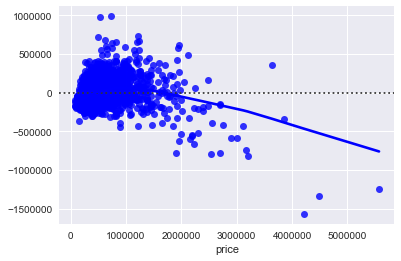

In [72]:
sns.residplot(y_test, y_hat_test_3, lowess=True, color='b')

In [65]:
X = ols_2.drop(['price'],axis=1)
Y = ols_2[['price']]
final_reg = LinearRegression(X,Y)

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/